In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.manifold import MDS

In [4]:
distance_matrix_raw = pd.read_csv("../data/distance_matrix.csv")
distance_matrix = distance_matrix_raw.values
labels = distance_matrix_raw.columns.tolist()

In [5]:
def run_many_seeds(dist_matrix, seeds, **mds_kwargs):
    results = []
    rank = []
    for seed in seeds:
        mds = MDS(dissimilarity='precomputed',
                  random_state=seed,
                  **mds_kwargs)
        coords = mds.fit_transform(dist_matrix)
        results.append((seed, mds.stress_, coords))
        print(f"seed {seed:3d}  stress {mds.stress_:,.2f}")
        rank.append((seed, mds.stress_))
    # pick the best one
    best_seed, best_stress, best_coords = min(results, key=lambda t: t[1])
    
    return best_coords, best_seed, best_stress, results, rank



# example usage
seeds   = range(600, 699)            # 0 … 99
coords, seed, stress, log, rank = run_many_seeds(distance_matrix_raw, seeds,
                                           n_components=2,
                                           normalized_stress='auto',
                                           max_iter=300)
#print(f"Best seed = {seed}, stress = {stress:,.4f}")
sorted_rank = sorted(rank, key = lambda x:x[1])
print(sorted_rank)


seed 600  stress 38.53
seed 601  stress 40.67
seed 602  stress 40.76
seed 603  stress 40.05
seed 604  stress 36.17
seed 605  stress 38.09
seed 606  stress 44.62
seed 607  stress 36.51
seed 608  stress 45.65
seed 609  stress 36.89
seed 610  stress 42.35
seed 611  stress 36.36
seed 612  stress 36.47
seed 613  stress 39.19
seed 614  stress 36.19
seed 615  stress 45.25
seed 616  stress 36.42
seed 617  stress 36.43
seed 618  stress 36.35
seed 619  stress 36.88
seed 620  stress 37.71
seed 621  stress 36.28
seed 622  stress 37.71
seed 623  stress 38.58
seed 624  stress 40.24
seed 625  stress 36.26
seed 626  stress 37.81
seed 627  stress 36.28
seed 628  stress 39.73
seed 629  stress 36.23
seed 630  stress 36.34
seed 631  stress 47.23
seed 632  stress 36.35
seed 633  stress 40.31
seed 634  stress 40.48
seed 635  stress 36.85
seed 636  stress 37.00
seed 637  stress 44.34
seed 638  stress 38.62
seed 639  stress 36.29
seed 640  stress 37.81
seed 641  stress 37.13
seed 642  stress 36.23
seed 643  s

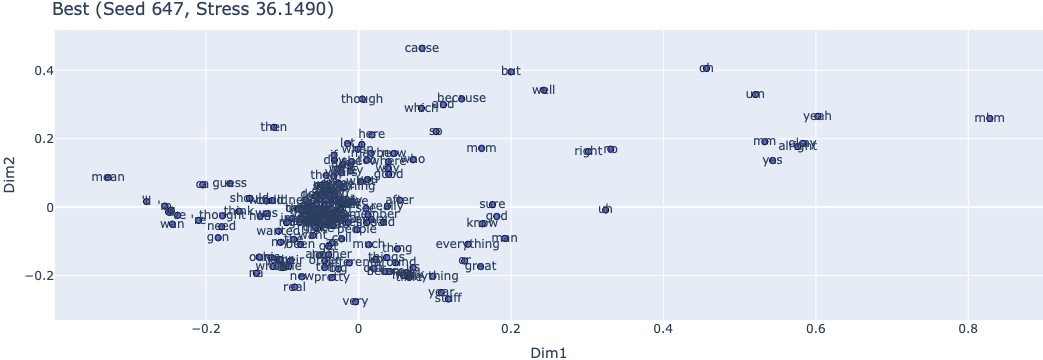

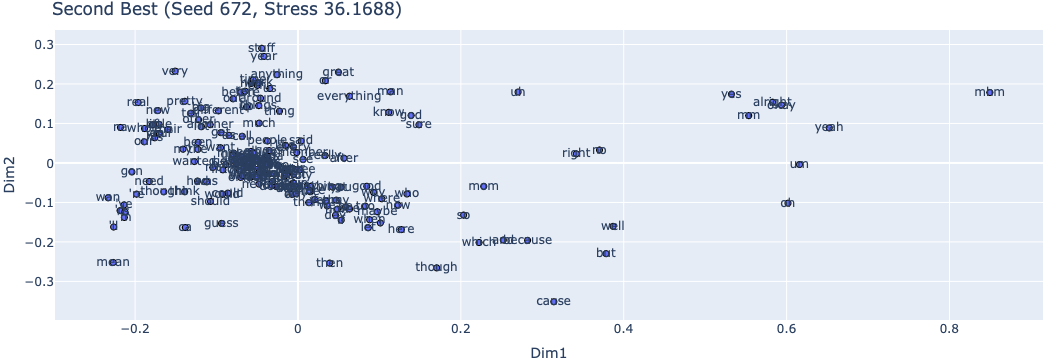

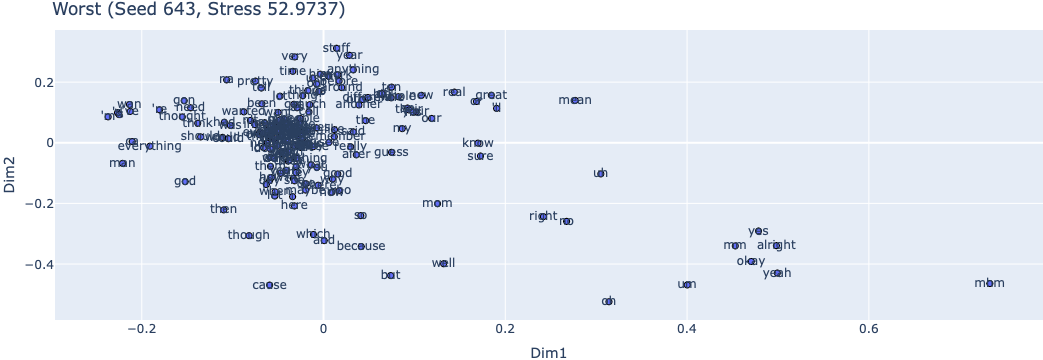

In [19]:
sorted_log = sorted(log, key=lambda t: t[1])

best = sorted_log[0]
second_best = next(t for t in sorted_log[1:] if t[1] > best[1])
worst = sorted_log[-1]

selected = [("Best", best), ("Second Best", second_best), ("Worst", worst)]

for label, (seed, stress, coords) in selected:
    mds_df = pd.DataFrame(coords, columns=["Dim1", "Dim2"])
    mds_df["Label"] = labels  

    fig = px.scatter(
        mds_df, x="Dim1", y="Dim2", text="Label",
        title=f"{label} (Seed {seed}, Stress {stress:.4f})"
    )
    fig.update_traces(marker=dict(size=6, line=dict(width=1, color='black')))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
    fig.show()

In [21]:
def run_many_seeds(dist_matrix, seeds, **mds_kwargs):
    results = []
    for seed in seeds:
        mds = MDS(dissimilarity='euclidean',
                  random_state=seed,
                  **mds_kwargs)
        coords = mds.fit_transform(dist_matrix)
        results.append((seed, mds.stress_, coords))
        print(f"seed {seed:3d}  stress {mds.stress_:,.2f}")
    # pick the best one
    best_seed, best_stress, best_coords = min(results, key=lambda t: t[1])
    return best_coords, best_seed, best_stress, results

# example usage
seeds   = range(600, 699)            # 0 … 99
coords, seed, stress, log = run_many_seeds(distance_matrix_raw, seeds,
                                           n_components=2,
                                           normalized_stress='auto',
                                           max_iter=300)
print(f"Best seed = {seed}, stress = {stress:,.4f}")


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 600  stress 1,503.78
seed 601  stress 1,492.52


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 602  stress 1,494.64
seed 603  stress 1,498.95


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 604  stress 1,493.65


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 605  stress 1,539.51
seed 606  stress 1,516.67


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 607  stress 1,497.19
seed 608  stress 1,502.95


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 609  stress 1,495.58
seed 610  stress 1,534.88


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 611  stress 1,516.65


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 612  stress 1,493.68
seed 613  stress 1,492.53


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 614  stress 1,528.30
seed 615  stress 1,496.13


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 616  stress 1,513.30
seed 617  stress 1,495.68


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 618  stress 1,510.34
seed 619  stress 1,503.46


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 620  stress 1,497.14
seed 621  stress 1,493.54


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 622  stress 1,495.71
seed 623  stress 1,494.57


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 624  stress 1,510.52
seed 625  stress 1,494.28


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 626  stress 1,516.53
seed 627  stress 1,496.56


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 628  stress 1,512.60
seed 629  stress 1,503.49


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 630  stress 1,495.77
seed 631  stress 1,494.79


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 632  stress 1,494.27


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 633  stress 1,494.06
seed 634  stress 1,498.47


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 635  stress 1,504.51


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 636  stress 1,499.66
seed 637  stress 1,531.41


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 638  stress 1,497.12
seed 639  stress 1,528.31


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 640  stress 1,499.32
seed 641  stress 1,493.75


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 642  stress 1,530.71
seed 643  stress 1,494.93


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 644  stress 1,517.52
seed 645  stress 1,492.72


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 646  stress 1,494.35
seed 647  stress 1,491.86


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 648  stress 1,505.07
seed 649  stress 1,493.63


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 650  stress 1,527.31


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 651  stress 1,514.99
seed 652  stress 1,531.27


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 653  stress 1,523.86


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 654  stress 1,512.82


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 655  stress 1,493.15


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 656  stress 1,495.21
seed 657  stress 1,502.29


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 658  stress 1,502.96
seed 659  stress 1,494.08


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 660  stress 1,499.87


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 661  stress 1,518.82


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 662  stress 1,494.49


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 663  stress 1,516.75
seed 664  stress 1,496.14


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 665  stress 1,538.44
seed 666  stress 1,509.45


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 667  stress 1,492.55
seed 668  stress 1,517.21


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 669  stress 1,492.27
seed 670  stress 1,497.05


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 671  stress 1,518.80


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 672  stress 1,493.36
seed 673  stress 1,495.62


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 674  stress 1,495.84
seed 675  stress 1,493.89


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 676  stress 1,526.69
seed 677  stress 1,510.63


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 678  stress 1,492.61
seed 679  stress 1,495.18


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 680  stress 1,528.93
seed 681  stress 1,492.84


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 682  stress 1,496.56
seed 683  stress 1,493.06


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 684  stress 1,493.86


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 685  stress 1,490.71
seed 686  stress 1,521.66


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 687  stress 1,497.97
seed 688  stress 1,502.28


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 689  stress 1,493.65


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 690  stress 1,509.66
seed 691  stress 1,493.15


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 692  stress 1,492.99
seed 693  stress 1,495.96


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 694  stress 1,505.39
seed 695  stress 1,496.52


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 696  stress 1,494.32
seed 697  stress 1,524.05


/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/opt/anaconda3/envs/mapper_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



seed 698  stress 1,530.33
Best seed = 685, stress = 1,490.7132


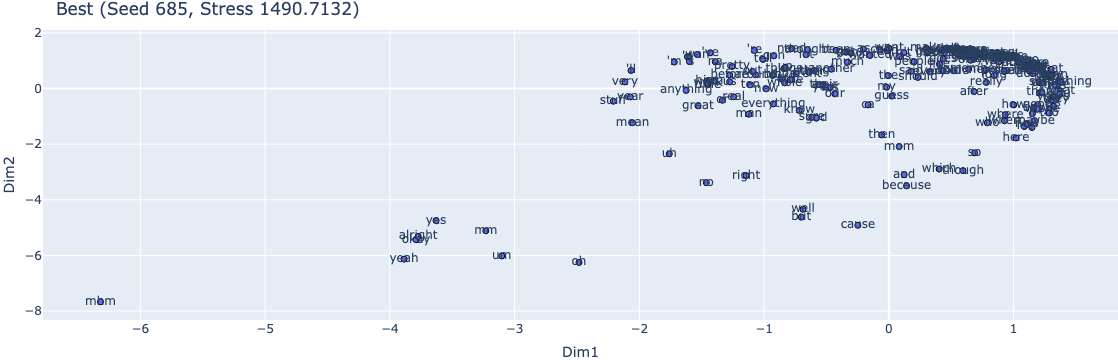

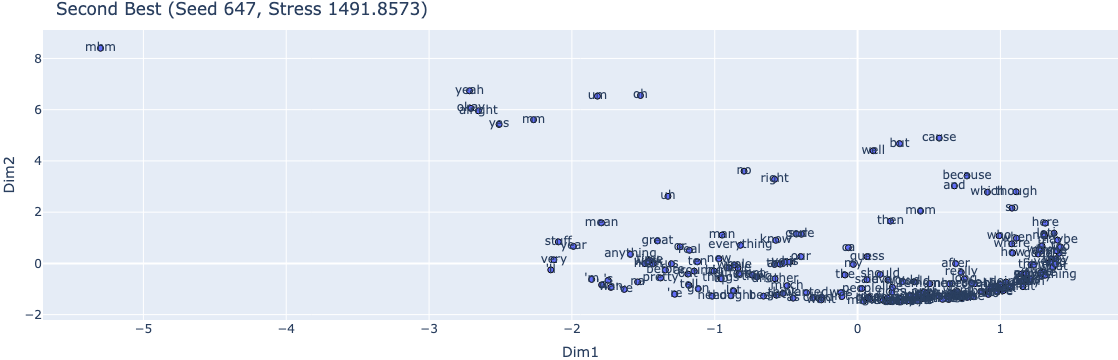

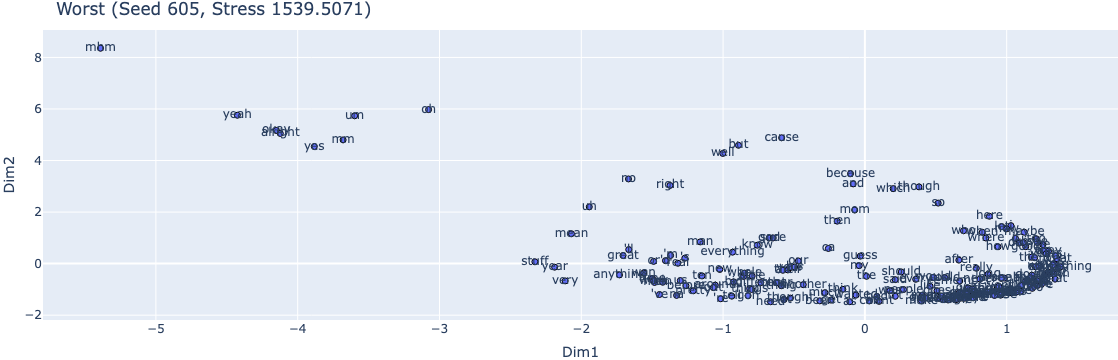

In [22]:
sorted_log = sorted(log, key=lambda t: t[1])

best = sorted_log[0]
second_best = next(t for t in sorted_log[1:] if t[1] > best[1])
worst = sorted_log[-1]

selected = [("Best", best), ("Second Best", second_best), ("Worst", worst)]

for label, (seed, stress, coords) in selected:
    mds_df = pd.DataFrame(coords, columns=["Dim1", "Dim2"])
    mds_df["Label"] = labels  

    fig = px.scatter(
        mds_df, x="Dim1", y="Dim2", text="Label",
        title=f"{label} (Seed {seed}, Stress {stress:.4f})"
    )
    fig.update_traces(marker=dict(size=6, line=dict(width=1, color='black')))
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
    fig.show()